In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
# Import et aperçu des datasets

df_continents = pd.read_csv('continents2.csv')
display(df_continents.head())

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [111]:
df_2024_Table = pd.read_excel('DataForTable2.1.xls')
display(df_2024_Table.head())

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.350416        0.450662   
1  Afghanistan  2009     4.401778            7.508646        0.552308   
2  Afghanistan  2010     4.758381            7.613900        0.539075   
3  Afghanistan  2011     3.831719            7.581259        0.521104   
4  Afghanistan  2012     3.782938            7.660506        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.500000                      0.718114    0.164055   
1                         50.799999                      0.678896    0.187297   
2                         51.099998                      0.600127    0.117861   
3                         51.400002                      0.495901    0.160098   
4                         51.700001                      0.530935    0.234157   

   Perceptions of corruption  Positive affect  Negative affect  
0                   0.881686         0.414297         0.258195  
1                   0.850035         0.481421         0.237092  
2                   0.706766         0.516907         0.275324  
3                   0.731109         0.479835         0.267175  
4                   0.775620         0.613513         0.267919

## Nettoyage des données

In [112]:
# Correspondance des noms de pays
df_2024_Table['Country name'] = df_2024_Table['Country name'].replace({'Türkiye':'Turkey',
                                                                       'Taiwan Province of China':'Taiwan',
                                                                       'Hong Kong S.A.R. of China':'Hong Kong'
                                                                       })

df_continents['name'] = df_continents['name'].replace({'Bosnia And Herzegovina':'Bosnia and Herzegovina',
                                                       'Congo (Democratic Republic Of The)':'Congo (Brazzaville)',
                                                       'Congo':'Congo (Kinshasa)',
                                                       "Côte D'Ivoire":'Ivory Coast',
                                                       'Czech Republic':'Czechia',
                                                       'Macedonia':'North Macedonia',
                                                       'Palestine, State of':'State of Palestine'
                                                       })

# Merge des 2 datasets
df_2024 = pd.merge(df_2024_Table, df_continents[['name', 'region','sub-region']], left_on = "Country name", right_on = "name", how = 'left')

# Drop colonne "name"
df_2024.drop(columns='name', inplace=True)

# Ordre et casse des colonnes
df_2024 = df_2024[['Country name', 'region', 'sub-region'] + [col for col in df_2024.columns if col not in ['Country name', 'region', 'sub-region']]]

df_2024 = df_2024.rename(columns={'region': 'Region', 'sub-region': 'Sub region', 'year': 'Year'})

# Ajout données Kosovo
df_2024.loc[df_2024['Country name'] == 'Kosovo', ['Region', 'Sub region']] = ['Europe', 'Southern Europe']

# Conservation des 10 dernières années 
df_2024 = df_2024.drop(df_2024[df_2024.Year < 2014].index)

In [113]:
df_2024.isna().sum()

Country name                         0
Region                               0
Sub region                           0
Year                                 0
Life Ladder                          0
Log GDP per capita                  22
Social support                       5
Healthy life expectancy at birth    35
Freedom to make life choices        20
Generosity                          30
Perceptions of corruption           77
Positive affect                     10
Negative affect                      9
dtype: int64

## Visualisation

In [114]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
df_2024.describe()

Year  Life Ladder  Log GDP per capita  Social support  \
count  1374.000000  1374.000000         1352.000000     1369.000000   
mean   2018.407569     5.513574            9.460066        0.806366   
std       2.889033     1.131228            1.153086        0.123369   
min    2014.000000     1.281271            5.526723        0.228217   
25%    2016.000000     4.673336            8.566326        0.739338   
50%    2018.000000     5.578238            9.555035        0.833975   
75%    2021.000000     6.339107           10.437841        0.902841   
max    2023.000000     7.889350           11.675588        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1339.000000                   1354.000000   
mean                          64.199705                      0.776887   
std                            6.177525                      0.125401   
min                           42.250000                      0.228301   
25%                           59.862499                      0.707082   
50%                           65.675003                      0.796839   
75%                           69.099998                      0.875712   
max                           74.599998                      0.985178   

        Generosity  Perceptions of corruption  Positive affect  \
count  1344.000000                1297.000000      1364.000000   
mean      0.003426                   0.731063         0.654362   
std       0.158646                   0.184151         0.105496   
min      -0.339547                   0.047311         0.178886   
25%      -0.110834                   0.673112         0.579122   
50%      -0.014689                   0.789023         0.666037   
75%       0.099294                   0.855206         0.737219   
max       0.699570                   0.976340         0.883586   

       Negative affect  
count      1365.000000  
mean          0.288166  
std           0.089036  
min           0.082737  
25%           0.221318  
50%           0.277231  
75%           0.345595  
max           0.642589

#### Pairplot

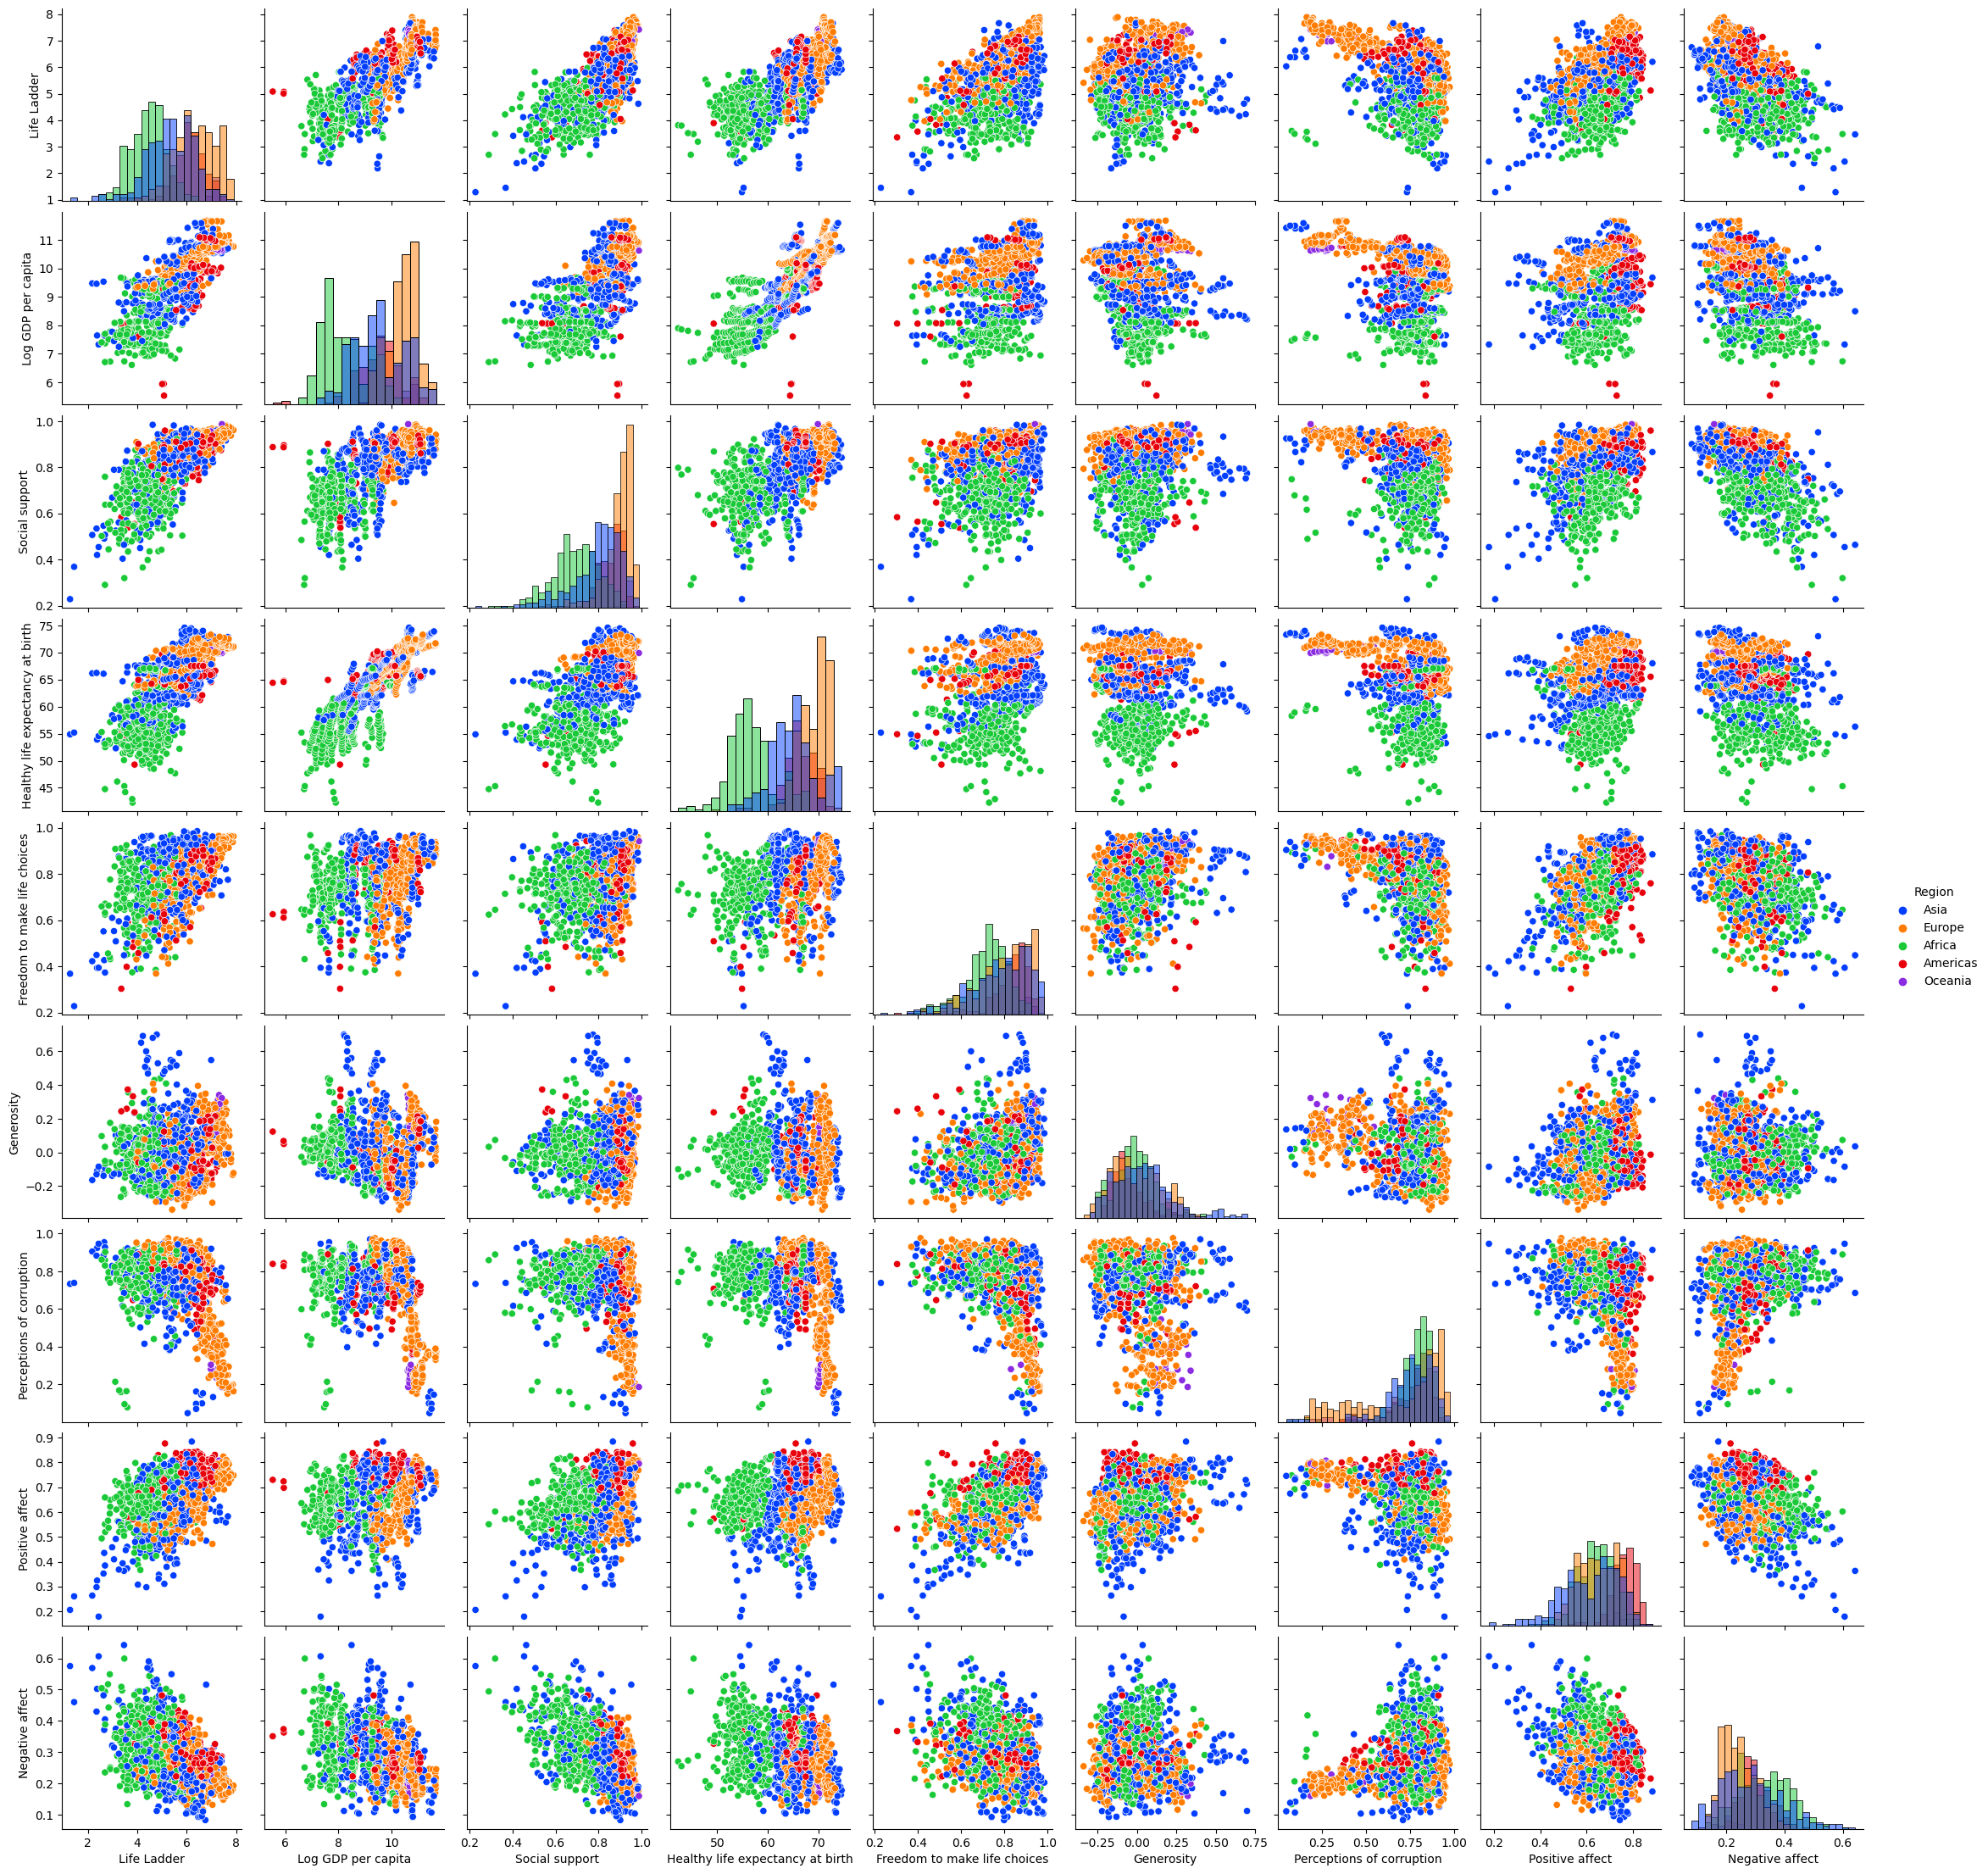

In [116]:
sns.pairplot(data = df_2024.drop(columns = 'Year'), diag_kind = 'hist', hue = 'Region', palette ='bright')

#### Heatmap

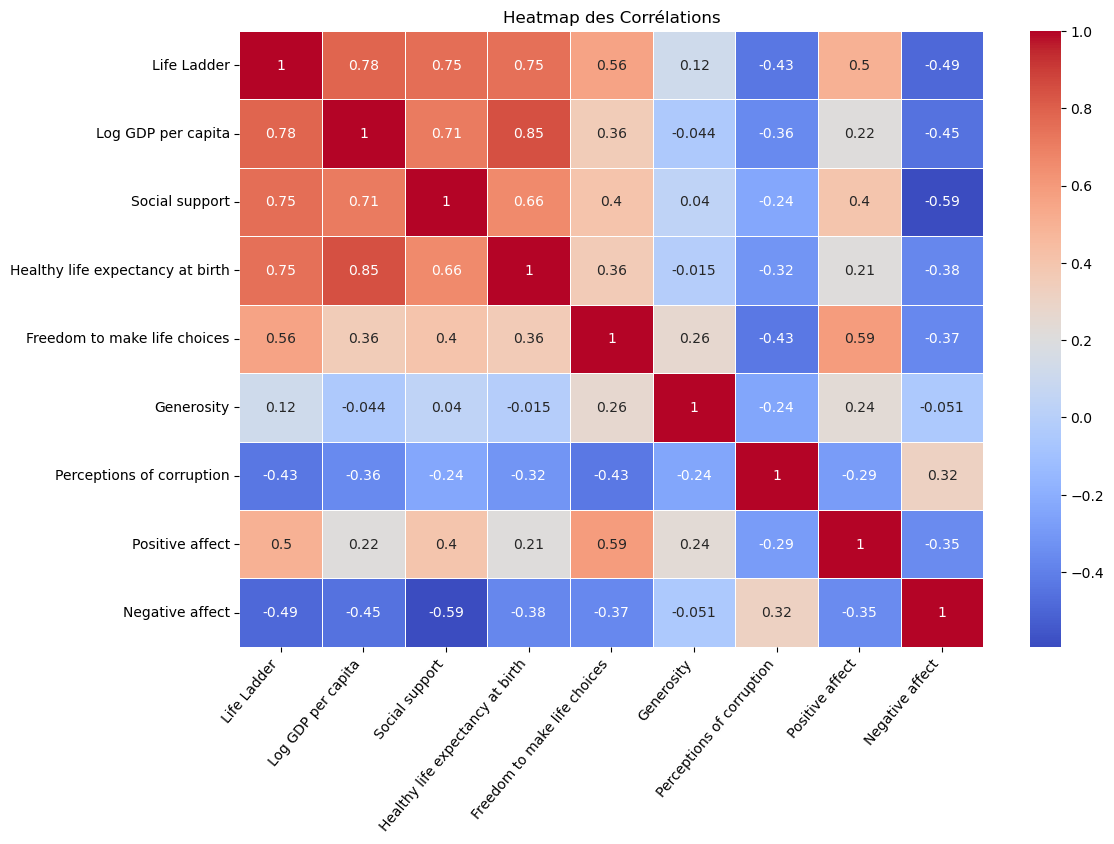

In [117]:
def conv_float(colonne):
    if df_2024[colonne].dtype == 'object':
        df_2024[colonne] = df_2024[colonne].str.replace(',', '.').astype(float)

colonnes_a_convertir = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                        'Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Positive affect', 'Negative affect']


for colonne in colonnes_a_convertir:
    conv_float(colonne)


corr = df_2024[colonnes_a_convertir].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=50,ha='right')
plt.title('Heatmap des Corrélations')
plt.show()

In [118]:
df_2024.head()

Country name Region     Sub region  Year  Life Ladder  Log GDP per capita  \
6   Afghanistan   Asia  Southern Asia  2014     3.130896            7.670638   
7   Afghanistan   Asia  Southern Asia  2015     3.982855            7.653833   
8   Afghanistan   Asia  Southern Asia  2016     4.220169            7.650370   
9   Afghanistan   Asia  Southern Asia  2017     2.661718            7.647830   
10  Afghanistan   Asia  Southern Asia  2018     2.694303            7.630801   

    Social support  Healthy life expectancy at birth  \
6         0.525568                         52.299999   
7         0.528597                         52.599998   
8         0.559072                         52.924999   
9         0.490880                         53.250000   
10        0.507516                         53.575001   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
6                       0.508514    0.102330                   0.871242   
7                       0.388928    0.078218                   0.880638   
8                       0.522566    0.040480                   0.793246   
9                       0.427011   -0.122848                   0.954393   
10                      0.373536   -0.094552                   0.927606   

    Positive affect  Negative affect  
6          0.491641         0.374861  
7          0.491410         0.339276  
8          0.501409         0.348332  
9          0.435270         0.371326  
10         0.384561         0.404904

#### Carte choroplèthe

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.express as px
import plotly.graph_objects as go

In [120]:
# On crée une carte avec des filtres pour les sous-région
fig = px.choropleth(df_2024,
                    locations='Country name',
                    locationmode='country names',
                    color='Life Ladder',
                    hover_name='Country name',
                    color_continuous_scale=px.colors.sequential.Magma,
                    title='Score de 2024 de Life Ladder par pays',
                    animation_frame='Sub region', # Ajout de l'animation pour les sous-régions
                    animation_group='Country name', # Ajout du groupe d'animation
                    )

# On ajoute les filtres pour les sous-régions via Plotly Dash
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGray")

# On affiche la carte
fig.show()

#### Graphiques de dispersion

In [121]:
# Création du graphique de dispersion
fig = px.scatter(df_2024, 
                 x='Log GDP per capita', 
                 y='Life Ladder', 
                 color='Country name',
                 title='Relation entre le Log PIB par habitant et la Satisfaction de vie',
                 labels={'Log GDP per capita': 'Log PIB par habitant', 'Life Ladder': 'Satisfaction de vie'},
                 hover_data=['Country name'])

# Afficher le graphique
fig.show()

In [122]:
# On crée un nuage de points pour explorer les relations potentielles
fig = px.scatter(df_2024, x='Log GDP per capita', y='Life Ladder', color='Region',
                 title='Relation entre le Log PIB par habitant et Life Ladder',
                 labels={'Log GDP per capita': 'Log PIB par habitant', 'Life Ladder': 'Satisfaction de vie'},
                 hover_name='Country name')

# On affiche le graphique
fig.show()

#### Courbes

In [123]:
# Calculer la moyenne pour 'Freedom_to_make_life_choices' pour chaque pays
df_grouped = df_2024.groupby('Country name').agg({
    'Freedom to make life choices': 'mean'
}).reset_index()

# Trier et sélectionner les top 5 pays
df_top5 = df_grouped.sort_values(by='Freedom to make life choices', ascending=False).head(5)

# Filtrer les données originales pour les top 5 pays
df_top5_countries = df_2024[df_2024['Country name'].isin(df_top5['Country name'])]

# Transformer le DataFrame en format long pour Plotly
df_long = df_top5_countries.melt(id_vars=['Country name', 'Year'],
                                  value_vars=['Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
                                  var_name='Indicator',
                                  value_name='Value')

# Créer le graphique
fig = px.line(df_long, x='Year', y='Value', color='Indicator',
              facet_col='Country name', facet_col_wrap=2,
              title='Top 5 Countries Based on Freedom to Make Life Choices')

fig.show()

#### Histogramme

In [126]:
#Conversion des colonnes numériques en float
cols_to_convert = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']

df_2024[cols_to_convert] = df_2024[cols_to_convert].astype(float)

# Vérification des colonnes
print("Colonnes disponibles dans df_2024:", df_2024.columns)

# Calculer les moyennes par région, en ignorant les colonnes non numériques
df_mean = df_2024.groupby('Region')[cols_to_convert].mean().reset_index()

# Vérification des colonnes après la transformation
print("Colonnes disponibles dans df_2024:", df_mean.columns)

# Transformation des données pour une visualisation avec plotly.express
df_long = df_mean.melt(id_vars=['Region'], 
                       value_vars=cols_to_convert,
                       var_name='Variable', 
                       value_name='Value')

# Créer un graphique en barres empilées pour comparer les valeurs moyennes
fig = px.bar(df_long, x='Region', y='Value', color='Variable', barmode='group',
             title='Comparaison des valeurs moyennes par région',
             labels={'Value': 'Valeur moyenne', 'Variable': 'Facteur'})

# Afficher le graphique
fig.show()

Colonnes disponibles dans df_2024: Index(['Country name', 'Region', 'Sub region', 'Year', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')
Colonnes disponibles dans df_2024: Index(['Region', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption'],
      dtype='object')
